In [2]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator

In [3]:
# downloads sample twitter dataset. uncomment the line below if running on a local machine.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [8]:
for name in twitter_samples.fileids():
    print(f" - {name}")

 - negative_tweets.json
 - positive_tweets.json
 - tweets.20150430-223406.json


In [9]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [10]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))
print(all_positive_tweets[5]);
print(all_negative_tweets[6]);

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>
@BhaktisBanter @PallaviRuhail This one is irresistible :)
#FlipkartFashionFriday http://t.co/EbZ0L2VENM
@RileyMcDonough make me smile :((


In [11]:
for tweet in all_positive_tweets:
    print(f" - {tweet}")

Streaming output truncated to the last 5000 lines.
 - @ollyofficial follow me please Olly :)
 - This is so beautiful :) via disney.arts by the talented elmoprinssi  :)
_ 

Don't forget to… https://t.co/UwsFDaeyzB
 - Bit tired from 3 hours of salsa dancing @LatinMotion last night but definitely worth it. Happy Friday everyone :-)
 - @PiperDonut thanks haha but i only tell the truth to you :):):)
 - @blossominglou yes pls :)))
 - I have gotten at least 3 hours of sleep on the past 4-6 days so the rest of the week should be interesting :) :3 ;)
 - @CCBMLov Thank you. : )
 - Check out my bro @13Mesh 2nd blogiversary! Many more awesome reviews to come :D ... http://t.co/a5xIGzTueL
 - With the top cutie of Bohol :) https://t.co/Jh7F6U46UB
 - @_ayeayecaptain  follow @jnlazts &amp; http://t.co/RCvcYYO0Iq follow u back :)
 - @BrizzleLass This is briliant. Was literally just having a conversation about post v email when I saw this :)
 - @ansriram they key word here is "annual". Haven't read anyo

In [12]:
import pandas as pd
import numpy as np
df = pd.DataFrame(all_positive_tweets,columns=['Tweets'])
df

,Tweets
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...
1,@Lamb2ja Hey James! How odd :/ Please call our...
2,@DespiteOfficial we had a listen last night :)...
3,@97sides CONGRATS :)
4,yeaaaah yippppy!!! my accnt verified rqst has...
...,...
4995,"@chriswiggin3 Chris, that's great to hear :) D..."
4996,@RachelLiskeard Thanks for the shout-out :) It...
4997,@side556 Hey! :) Long time no talk...
4998,@staybubbly69 as Matt would say. WELCOME TO AD...


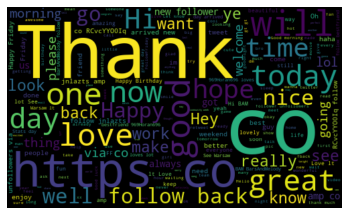

In [13]:
from wordcloud import WordCloud
allWords = ' '.join( [twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

TextBlob เป็น Python Library สำหรับประมวลผลข้อมูลที่เป็น Text มันมี API ที่เรียบง่ายสำหรับการดำเนินการใน Natural Language Processing (NLP) Tasks เช่น Part-of-Speech Tagging, Noun Phrase Extraction, Sentiment Analysis, Classification, Translation และอื่น ๆ

In [14]:

from textblob import TextBlob
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity) #ข้อความที่แสดงอัตวิสัย (ไม่ใช่ข้อเท็จจริง)

df['Polarity'] = df['Tweets'].apply(getPolarity)  #ระบุขั้วความรู้สึก  >0 คือ บวก

df

,Tweets,Subjectivity,Polarity
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,0.750000,0.500000
1,@Lamb2ja Hey James! How odd :/ Please call our...,0.595833,0.222222
2,@DespiteOfficial we had a listen last night :)...,0.655556,0.416667
3,@97sides CONGRATS :),1.000000,0.500000
4,yeaaaah yippppy!!! my accnt verified rqst has...,0.550000,0.250000
...,...,...,...
4995,"@chriswiggin3 Chris, that's great to hear :) D...",0.500000,0.245833
4996,@RachelLiskeard Thanks for the shout-out :) It...,0.650000,0.500000
4997,@side556 Hey! :) Long time no talk...,0.700000,0.225000
4998,@staybubbly69 as Matt would say. WELCOME TO AD...,0.950000,0.650000


In [15]:
def getAnalysis(score):
    if score < 0 :
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return "Positive"

df["Analysis"] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,0.750000,0.500000,Positive
1,@Lamb2ja Hey James! How odd :/ Please call our...,0.595833,0.222222,Positive
2,@DespiteOfficial we had a listen last night :)...,0.655556,0.416667,Positive
3,@97sides CONGRATS :),1.000000,0.500000,Positive
4,yeaaaah yippppy!!! my accnt verified rqst has...,0.550000,0.250000,Positive
...,...,...,...,...
4995,"@chriswiggin3 Chris, that's great to hear :) D...",0.500000,0.245833,Positive
4996,@RachelLiskeard Thanks for the shout-out :) It...,0.650000,0.500000,Positive
4997,@side556 Hey! :) Long time no talk...,0.700000,0.225000,Positive
4998,@staybubbly69 as Matt would say. WELCOME TO AD...,0.950000,0.650000,Positive


# Preprocess raw text for Sentiment analysis
Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:
 **ให้นักศึกษา preprocess ข้อความจาก twitter_samples ด้วยกระบวนการเหล่านี้**
1. Tokenizing the string
2. Regular expression
3. Removing stop words 
4. Text Lemmatization and Stemming

In [16]:
import nltk
nltk.download('punkt') 
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# 1. Tokenizing the string

In [17]:
from nltk.tokenize import word_tokenize
tweetText = df['Tweets']
tweetText = tweetText.apply(word_tokenize)
tweetText

0       [#, FollowFriday, @, France_Inte, @, PKuchly57...
1       [@, Lamb2ja, Hey, James, !, How, odd, :, /, Pl...
2       [@, DespiteOfficial, we, had, a, listen, last,...
3                            [@, 97sides, CONGRATS, :, )]
4       [yeaaaah, yippppy, !, !, !, my, accnt, verifie...
                              ...                        
4995    [@, chriswiggin3, Chris, ,, that, 's, great, t...
4996    [@, RachelLiskeard, Thanks, for, the, shout-ou...
4997    [@, side556, Hey, !, :, ), Long, time, no, tal...
4998    [@, staybubbly69, as, Matt, would, say, ., WEL...
4999    [@, DanielOConnel18, you, could, say, he, will...
Name: Tweets, Length: 5000, dtype: object

# 2. Removing stop words** 




In [18]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [19]:
tweetText = df['Tweets']
df["Token"]  = tweetText.apply(word_tokenize)
def getstop(Name):
  stop_words = set(stopwords.words('english')) 
  filtered_sentence = [] 
  for w in Name: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
  return  filtered_sentence

df["stop_words"]  = df['Token'].apply(getstop)
df

,Tweets,Subjectivity,Polarity,Analysis,Token,stop_words
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,0.750000,0.500000,Positive,"[#, FollowFriday, @, France_Inte, @, PKuchly57...","[#, FollowFriday, @, France_Inte, @, PKuchly57..."
1,@Lamb2ja Hey James! How odd :/ Please call our...,0.595833,0.222222,Positive,"[@, Lamb2ja, Hey, James, !, How, odd, :, /, Pl...","[@, Lamb2ja, Hey, James, !, How, odd, :, /, Pl..."
2,@DespiteOfficial we had a listen last night :)...,0.655556,0.416667,Positive,"[@, DespiteOfficial, we, had, a, listen, last,...","[@, DespiteOfficial, listen, last, night, :, )..."
3,@97sides CONGRATS :),1.000000,0.500000,Positive,"[@, 97sides, CONGRATS, :, )]","[@, 97sides, CONGRATS, :, )]"
4,yeaaaah yippppy!!! my accnt verified rqst has...,0.550000,0.250000,Positive,"[yeaaaah, yippppy, !, !, !, my, accnt, verifie...","[yeaaaah, yippppy, !, !, !, accnt, verified, r..."
...,...,...,...,...,...,...
4995,"@chriswiggin3 Chris, that's great to hear :) D...",0.500000,0.245833,Positive,"[@, chriswiggin3, Chris, ,, that, 's, great, t...","[@, chriswiggin3, Chris, ,, 's, great, hear, :..."
4996,@RachelLiskeard Thanks for the shout-out :) It...,0.650000,0.500000,Positive,"[@, RachelLiskeard, Thanks, for, the, shout-ou...","[@, RachelLiskeard, Thanks, shout-out, :, ), I..."
4997,@side556 Hey! :) Long time no talk...,0.700000,0.225000,Positive,"[@, side556, Hey, !, :, ), Long, time, no, tal...","[@, side556, Hey, !, :, ), Long, time, talk, ...]"
4998,@staybubbly69 as Matt would say. WELCOME TO AD...,0.950000,0.650000,Positive,"[@, staybubbly69, as, Matt, would, say, ., WEL...","[@, staybubbly69, Matt, would, say, ., WELCOME..."


# 3. Text Lemmatization 

In [ ]:
nltk.download('wordnet')

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize 
from nltk import pos_tag

def Lemma(comment):
  wordnet = WordNetLemmatizer()

  j = []
  for token,tag in pos_tag(comment):
    pos=tag[0].lower()
    if pos not in ['a','r','n','v']:
        pos='n'

    j.append(wordnet.lemmatize(token,pos)) 
  return(j)

df['Lemmatizetion'] = df['Token'].apply(Lemma)
df

# 4. Stemming

In [ ]:
from nltk.stem import PorterStemmer 
def stemming(sent):
  ps = PorterStemmer()
  ps_sent = [ps.stem(words_sent) for words_sent in sent]
  return ps_sent
df['Stemming'] = df['Token'].apply(stemming)
df

,Tweets,Subjectivity,Polarity,Analysis,Token,stop_words,Lemmatizetion,Stemming
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,0.750000,0.500000,Positive,"[#, FollowFriday, @, France_Inte, @, PKuchly57...","[#, FollowFriday, @, France_Inte, @, PKuchly57...","[#, FollowFriday, @, France_Inte, @, PKuchly57...","[#, followfriday, @, france_int, @, pkuchly57,..."
1,@Lamb2ja Hey James! How odd :/ Please call our...,0.595833,0.222222,Positive,"[@, Lamb2ja, Hey, James, !, How, odd, :, /, Pl...","[@, Lamb2ja, Hey, James, !, How, odd, :, /, Pl...","[@, Lamb2ja, Hey, James, !, How, odd, :, /, Pl...","[@, lamb2ja, hey, jame, !, how, odd, :, /, ple..."
2,@DespiteOfficial we had a listen last night :)...,0.655556,0.416667,Positive,"[@, DespiteOfficial, we, had, a, listen, last,...","[@, DespiteOfficial, listen, last, night, :, )...","[@, DespiteOfficial, we, have, a, listen, last...","[@, despiteoffici, we, had, a, listen, last, n..."
3,@97sides CONGRATS :),1.000000,0.500000,Positive,"[@, 97sides, CONGRATS, :, )]","[@, 97sides, CONGRATS, :, )]","[@, 97sides, CONGRATS, :, )]","[@, 97side, congrat, :, )]"
4,yeaaaah yippppy!!! my accnt verified rqst has...,0.550000,0.250000,Positive,"[yeaaaah, yippppy, !, !, !, my, accnt, verifie...","[yeaaaah, yippppy, !, !, !, accnt, verified, r...","[yeaaaah, yippppy, !, !, !, my, accnt, verify,...","[yeaaaah, yippppi, !, !, !, my, accnt, verifi,..."
...,...,...,...,...,...,...,...,...
4995,"@chriswiggin3 Chris, that's great to hear :) D...",0.500000,0.245833,Positive,"[@, chriswiggin3, Chris, ,, that, 's, great, t...","[@, chriswiggin3, Chris, ,, 's, great, hear, :...","[@, chriswiggin3, Chris, ,, that, 's, great, t...","[@, chriswiggin3, chri, ,, that, 's, great, to..."
4996,@RachelLiskeard Thanks for the shout-out :) It...,0.650000,0.500000,Positive,"[@, RachelLiskeard, Thanks, for, the, shout-ou...","[@, RachelLiskeard, Thanks, shout-out, :, ), I...","[@, RachelLiskeard, Thanks, for, the, shout-ou...","[@, rachelliskeard, thank, for, the, shout-out..."
4997,@side556 Hey! :) Long time no talk...,0.700000,0.225000,Positive,"[@, side556, Hey, !, :, ), Long, time, no, tal...","[@, side556, Hey, !, :, ), Long, time, talk, ...]","[@, side556, Hey, !, :, ), Long, time, no, tal...","[@, side556, hey, !, :, ), long, time, no, tal..."
4998,@staybubbly69 as Matt would say. WELCOME TO AD...,0.950000,0.650000,Positive,"[@, staybubbly69, as, Matt, would, say, ., WEL...","[@, staybubbly69, Matt, would, say, ., WELCOME...","[@, staybubbly69, a, Matt, would, say, ., WELC...","[@, staybubbly69, as, matt, would, say, ., wel..."
